# Librerias

In [1]:
!pip install opendatasets --upgrade
!pip install isodate

In [2]:
import opendatasets as od
import pandas as pd
import isodate # for total, prep and cook times
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
# isodate.parse_duration("PT24H45M") # para el futuro

# Dataset, descarga e informacion general

In [3]:
od.download_kaggle_dataset("https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews", "data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ñ
 ··········
Your Kaggle Key:Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews


100%|██████████| 723M/723M [00:05<00:00, 140MB/s]


In [4]:
recipes = pd.read_parquet("data/foodcom-recipes-and-reviews/recipes.parquet")
recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [11]:
from tqdm.notebook import tqdm

In [12]:
all_kw = set()
for i in tqdm(range(len(recipes))):
    recipe = recipes.iloc[i]
    all_kw.update(recipe["Keywords"])

  0%|          | 0/522517 [00:00<?, ?it/s]

In [14]:
all_kw = {kw: i for i, kw in enumerate(all_kw)}

In [20]:
recipes_kw = {}
for i in tqdm(range(len(recipes))):
    recipe = recipes.iloc[i]
    kws = recipe["Keywords"]
    kws = [all_kw[kw] for kw in kws]
    id = recipe["RecipeId"]
    recipes_kw[id] = kws

  0%|          | 0/522517 [00:00<?, ?it/s]

In [23]:
import json
with open("recipe_id_to_kw_id.json", "w") as f:
    json.dump(recipes_kw, f)


In [24]:
with open("kw_to_kw_id.json", "w") as f:
    json.dump(all_kw, f)

In [ ]:
reviews = pd.read_parquet("data/foodcom-recipes-and-reviews/reviews.parquet")
reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[us, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[us, UTC]
 7   DateModified   1401982 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), int32(4), object(2)
memory usage: 64.2+ MB


In [ ]:
recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [ ]:
reviews.describe()

,ReviewId,RecipeId,AuthorId,Rating
count,1.401982e+06,1.401982e+06,1.401982e+06,1.401982e+06
mean,8.179739e+05,1.526412e+05,1.558638e+08,4.407951e+00
std,5.280821e+05,1.301112e+05,5.305111e+08,1.272012e+00
min,2.000000e+00,3.800000e+01,1.533000e+03,0.000000e+00
25%,3.743862e+05,4.703875e+04,1.336800e+05,4.000000e+00
50%,7.717805e+05,1.093270e+05,3.305450e+05,5.000000e+00
75%,1.204126e+06,2.318768e+05,8.183590e+05,5.000000e+00
max,2.090347e+06,5.412980e+05,2.002902e+09,5.000000e+00


# Analisis

## Anomalias
Hay 28 recetas que tienen llevan a mas de 500 porciones, incluso 3 tienen mas de 32k porciones.

In [ ]:
# pd.set_option('display.max_colwidth', 50)
filter_cols = ['RecipeId', 'Name','Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'RecipeServings', 'RecipeYield', 'RecipeInstructions', 'Description']
len(recipes[recipes["RecipeServings"] >= 500][filter_cols])

28

# Valores nulos, listas de imagenes vacias o NaN

In [ ]:
reviews_bad_cols = {}
for review in tqdm(reviews.iterrows()):
  for column in reviews.columns:
    if type(review[1][column]) == np.ndarray and len(review[1][column]) == 0:
      if column not in reviews_bad_cols:
        reviews_bad_cols[column] = {"count": 1, "indices": []}
      else:
        reviews_bad_cols[column]["count"] += 1
      reviews_bad_cols[column]["indices"].append(review[0])
    elif  type(review[1][column]) == str and (review[1][column].lower() == "none" or review[1][column].lower() == "null"):
      if column not in reviews_bad_cols:
        reviews_bad_cols[column] = {"count": 1, "indices": []}
      else:
        reviews_bad_cols[column]["count"] += 1
      reviews_bad_cols[column]["indices"].append(review[0])
    elif type(review[1][column]) == float and np.isnan(review[1][column]):
      if column not in reviews_bad_cols:
        reviews_bad_cols[column] = {"count": 1, "indices": []}
      else:
        reviews_bad_cols[column]["count"] += 1
      reviews_bad_cols[column]["indices"].append(review[0])
    elif review[1][column] is None:
      if column not in reviews_bad_cols:
        reviews_bad_cols[column] = {"count": 1, "indices": []}
      else:
        reviews_bad_cols[column]["count"] += 1
      reviews_bad_cols[column]["indices"].append(review[0])

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
for recipe in tqdm(recipes.iterrows()):
  for column in recipes.columns:
    if type(recipe[1][column]) == np.ndarray and len(recipe[1][column]) == 0:
      if column not in recipes_bad_cols:
        recipes_bad_cols[column] = {"count": 1, "indices": []}
      else:
        recipes_bad_cols[column]["count"] += 1
      recipes_bad_cols[column]["indices"].append(recipe[0])
    elif  type(recipe[1][column]) == str and (recipe[1][column].lower() == "none" or recipe[1][column].lower() == "null"):
      if column not in recipes_bad_cols:
        recipes_bad_cols[column] = {"count": 1, "indices": []}
      else:
        recipes_bad_cols[column]["count"] += 1
      recipes_bad_cols[column]["indices"].append(recipe[0])
    elif type(recipe[1][column]) == float and np.isnan(recipe[1][column]):
      if column not in recipes_bad_cols:
        recipes_bad_cols[column] = {"count": 1, "indices": []}
      else:
        recipes_bad_cols[column]["count"] += 1
      recipes_bad_cols[column]["indices"].append(recipe[0])
    elif recipe[1][column] is None:
      if column not in recipes_bad_cols:
        recipes_bad_cols[column] = {"count": 1, "indices": []}
      else:
        recipes_bad_cols[column]["count"] += 1
      recipes_bad_cols[column]["indices"].append(recipe[0])

In [ ]:
reviews_bad_cols

In [ ]:
reviews.iloc[[1189911, 1190272, 1190534, 1191829, 1193844]]

In [ ]:
for key in recipes_bad_cols:
  print(key, recipes_bad_cols[key])

# Data separation

In [ ]:
def check_users(train_users, test_users):
  users_in_train = set(train_users)
  users_in_test = set(test_users)
  users_out_of_train = users_in_test - users_in_train
  if users_out_of_train != set():
    raise Exception(f"Users {users_out_of_train} are not in train")



In [ ]:
def get_train_and_test(reviews, test_size):
  np.random.seed(314159265)
  reviews_randomized = list(reviews.itertuples(index=True))
  np.random.shuffle(reviews_randomized)
  test_tuples = []

  user_review_counts = reviews.groupby('AuthorId').size()
  users_with_multiple_reviews_counts = user_review_counts[user_review_counts > 1].to_dict()
  users_with_multiple_reviews = set(users_with_multiple_reviews_counts.keys())

  for review in tqdm(reviews_randomized):
    if review.AuthorId not in users_with_multiple_reviews: continue
    users_with_multiple_reviews_counts[review.AuthorId] -= 1
    if users_with_multiple_reviews_counts[review.AuthorId] == 1:
      users_with_multiple_reviews.remove(review.AuthorId)

    test_tuples.append(review)
    if len(test_tuples) >= len(reviews) * test_size: break
  test_df = pd.DataFrame(test_tuples).set_index("Index")
  train_df = reviews.drop(test_df.index)
  return train_df, test_df

In [ ]:
train_df, test_df = get_train_and_test(reviews, 0.2)

  0%|          | 0/1401982 [00:00<?, ?it/s]

In [ ]:
check_users(train_df["AuthorId"], test_df["AuthorId"])

## Recetas que aparecen en reviews

In [ ]:
recipes_in_reviews = set(reviews["RecipeId"])
amount_recipes_in_reviews = len(recipes_in_reviews)
total_recipes = len(recipes)
print(f"Recetas que aparecen en reviews: {amount_recipes_in_reviews}/{total_recipes}")
print(f"lo que equivale a un {100 * amount_recipes_in_reviews / total_recipes}%")

Recetas que aparecen en reviews: 271678/522517
lo que equivale a un 51.99409779968882%


# Distribucion de datos
Con la separacion de datos de entrenamiento y de test que realizamos logramos una obtener una muestra significativa de los datos en ambos casos (test y train). Debemos asegurarnos que en test TODOS los usuarios hayan estado presentes en el entrenamiento

In [ ]:
def plot_distribution_norm(x_values, df_ratings, ax, width=1, offset=0, label=""):
  """Plot the the normalized distribution of y values"""
  y_values, _ = np.histogram(df_ratings, x_values)
  y_values = np.array(y_values)
  ax.bar(
      x_values[:-1] + offset,
      y_values / sum(y_values),
      width,
      label=label,
  )
  ax.set_xticks(x_values[:-1])

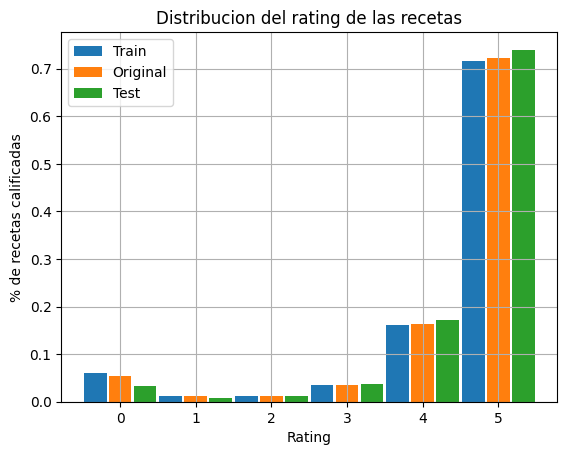

In [ ]:
fig, ax = plt.subplots()
rating_x = np.array([0, 1, 2, 3, 4, 5, 5.1])
width = 0.3
plot_distribution_norm(
  rating_x,
  train_df["Rating"],
  ax,
  width,
  offset = -width * 1.1,
  label = "Train")

plot_distribution_norm(
  rating_x,
  reviews["Rating"],
  ax,
  width,
  offset = 0,
  label = "Original")

plot_distribution_norm(
  rating_x,
  test_df["Rating"],
  ax,
  width,
  offset = width * 1.1,
  label = "Test")

ax.set_xlabel("Rating")
ax.set_ylabel("% de recetas calificadas")
ax.legend()
ax.grid()
ax.set_title("Distribucion del rating de las recetas")
fig.show()

In [ ]:
recipe_reviews = {
    "original": reviews.groupby("RecipeId").size().to_list(),
    "train": train_df.groupby("RecipeId").size().to_list(),
    "test": test_df.groupby("RecipeId").size().to_list()
}
user_reviews = {
    "original": reviews.groupby("AuthorId").size().to_list(),
    "train": train_df.groupby("AuthorId").size().to_list(),
    "test": test_df.groupby("AuthorId").size().to_list()
}


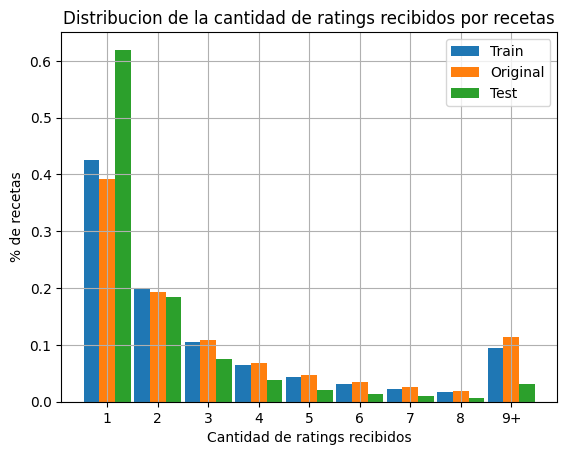

In [ ]:
fig, ax = plt.subplots()
separation = np.linspace(1, 10, 10)
width = 0.31
separation[-1] = np.inf
plot_distribution_norm(
  separation,
  recipe_reviews["train"],
  ax,
  width,
  offset = -width,
  label = "Train")

plot_distribution_norm(
  separation,
  recipe_reviews["original"],
  ax,
  width,
  offset = 0,
  label = "Original")

plot_distribution_norm(
  separation,
  recipe_reviews["test"],
  ax,
  width,
  offset = width,
  label = "Test")

ax.grid()
ax.set_xlabel("Cantidad de ratings recibidos")
ax.set_ylabel("% de recetas")
ax.legend()
ax.set_xticks(separation[:-1])
tick_labels = list(map(str, map(int, separation[:-1])))
tick_labels[-1] = f"{tick_labels[-1]}+"
ax.set_xticklabels(tick_labels)
ax.set_title("Distribucion de la cantidad de ratings recibidos por recetas")
fig.show()

Text(0.5, 1.0, 'Distribucion de la cantidad de ratings realizados por usuarios')

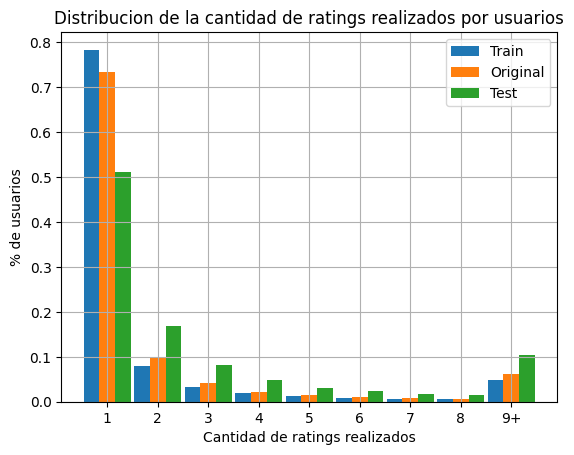

In [ ]:
fig, ax = plt.subplots()
separation = np.linspace(1, 10, 10)
width = 0.31
separation[-1] = np.inf
plot_distribution_norm(
  separation,
  user_reviews["train"],
  ax,
  width,
  offset = -width,
  label = "Train")

plot_distribution_norm(
  separation,
  user_reviews["original"],
  ax,
  width,
  offset = 0,
  label = "Original")

plot_distribution_norm(
  separation,
  user_reviews["test"],
  ax,
  width,
  offset = width,
  label = "Test")

ax.grid()
ax.set_xlabel("Cantidad de ratings realizados")
ax.set_ylabel("% de usuarios")
ax.legend()
ax.set_xticks(separation[:-1])
tick_labels = list(map(str, map(int, separation[:-1])))
tick_labels[-1] = f"{tick_labels[-1]}+"
ax.set_xticklabels(tick_labels)
ax.set_title("Distribucion de la cantidad de ratings realizados por usuarios")

# Comentarios
- No es neesario un float64, podemos poner un float32 para ahorrar espacio.
- No hay datos nulos pero hay datos que tienen string = "None"
- No queda claro a que se refieren las cantidades de ingredientes: kilos, punds, number, cups?
- keywords deberia facilitarnos la pega de extraer informacion relevante. PERO, hay que tener cuidado porque la manipulacion de keywords por parte de usuarios puede llevar a que sus recetas destaquen por cosas que no tienen.
- La mayoria da muy buenas calificaciones, media de 4.4